### Mean Shift Segmentator program

We perform below the first step of the mean shift segmentation pipeline. The output of the segmentor is a smoothed, filtered "posterized" image with color gradients and fine grain texture flattened [https://docs.opencv.org/3.4.1/d4/d86/group__imgproc__filter.html#ga9fabdce9543bd602445f5db3827e4cc0]
<br>Here we use OpenCV's implementation of mean shift segmentation using cv2.pyrMeanShiftFiltering. 
In brief, the algorithm performs smoothing using averaging in a 5D space. 2 dimensions comprises of the spatial variation and the other 3 of the color space. In our program, we use the LAB colorspace.The algorithm finds the local maxima points of the "density" plot of the image in the 5D space using Mean-Shift analysis.
<br> 

<br> Basic algorithm:
<br> 1. Read input image
<br> 2. Convert to LAB space
<br> 3. Perform Mean shift filtering by specifying the spatial and color window radius with level - 1 pyramid
<br> 4. Convert the output to RGB space and display

### Below is the code for mean shift segmentor on the given input images:

In [19]:
#code resources: https://github.com/daviddoria/Examples/blob/master/c%2B%2B/OpenCV/MeanShiftSegmentation/MeanShiftSegmentation.cxx
import cv2

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import prettytable as pt

In [8]:
%matplotlib inline

In [43]:
##function to calculate the mean shift in LAB space and 
#convert to RGB space to display the output
def mean_shift(img, sp, sc, msg): 
    out = cv2.pyrMeanShiftFiltering(img, sp, sc)
    rgb = cv2.cvtColor(out,cv2.COLOR_LAB2BGR)
    print("Mean shift with spatial :", sp, " and color: ", sc)
    print(msg)
    plt.imshow(rgb)
    plt.show()
    

In [11]:
cow = "2007_000464"
airplane = "2007_001288"
vodka = "2007_002953"
bike = "2007_005989"
objects=[cow, airplane, vodka, bike]

In [12]:
#our chosen spatial and color distances
cow = [(20,50,"Pretty Good"),(30,10,"Too Little segmentation"),(30,60, "Pretty Good"),(40,90, "Over segmentation")]

#### We can see above, 2 good outputs and 2 not so good outputs after qualitatively comparing with the given ground truth images.

In [ ]:
img_path = objects[0]+'.jpg' 
img = cv2.imread(img_path) #read the input
print("Image:")
plt.imshow(img)
plt.show()
gt_path = objects[0] + '.png' #read the ground truth
gt = cv2.imread(gt_path)

print("Ground Truth:")
plt.imshow(gt)
plt.show()

Image:


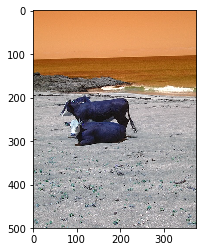

Ground Truth:


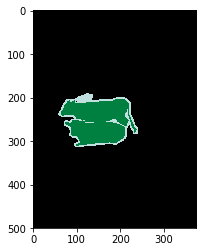

Mean shift with spatial : 20  and color:  50
Pretty Good


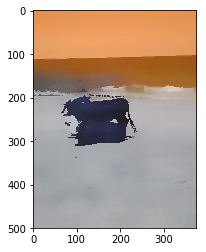

Mean shift with spatial : 30  and color:  10
Too Little segmentation


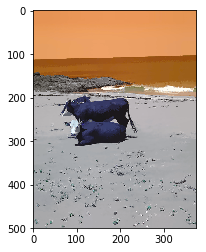

Mean shift with spatial : 30  and color:  60
Pretty Good


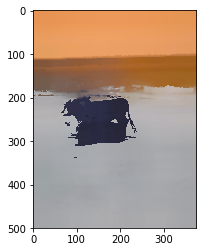

Mean shift with spatial : 40  and color:  90
Over segmentation


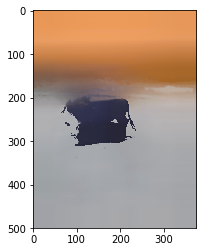

In [16]:
lab = cv2.cvtColor(img,cv2.COLOR_BGR2LAB) #convert image to lab space
for i,j,x in cow: 
    mean_shift(lab, i,j,x)

Image:


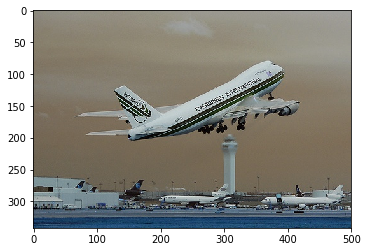

In [45]:
airplane = [(20,20,"Pretty Good"),(20,60,"Over Segmentation"),(40,30, "Pretty Good"),(10,10, "Less Segmentation")]
img_path = objects[1]+'.jpg'
img = cv2.imread(img_path)
print("Image:")
plt.imshow(img)
plt.show()

Ground Truth:


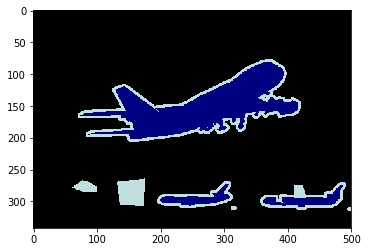

In [46]:
gt_path = objects[1] + '.png'
gt = cv2.imread(gt_path)
print("Ground Truth:")
plt.imshow(gt)
plt.show()

Mean shift with spatial : 20  and color:  20
Pretty Good


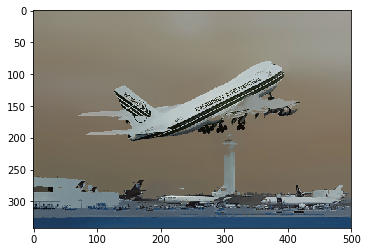

Mean shift with spatial : 20  and color:  60
Over Segmentation


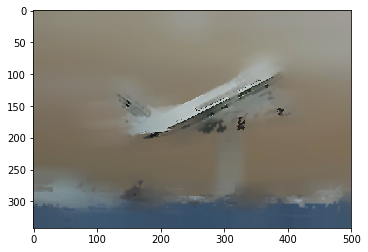

Mean shift with spatial : 40  and color:  30
Pretty Good


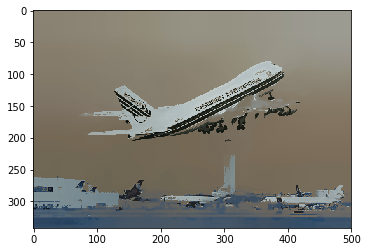

Mean shift with spatial : 10  and color:  10
Less Segmentation


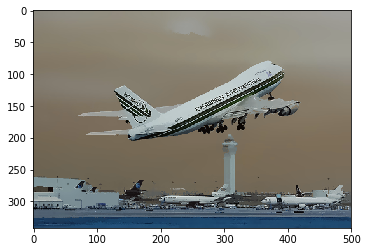

In [47]:
lab = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
for i,j,x in airplane:
    mean_shift(lab, i,j,x)

In [ ]:
vodka = [(10,20,"Less Segmentation"),(10,70,"Over Segmentation"),(30,50, "Pretty Good"),(40,60, "Pretty Good")]
img_path = objects[2]+'.jpg'
img = cv2.imread(img_path)
print("Image:")

In [ ]:
plt.imshow(img)
plt.show()
gt_path = objects[2] + '.png'
gt = cv2.imread(gt_path)
print("Ground Truth:")
plt.imshow(gt)
plt.show()

Image:


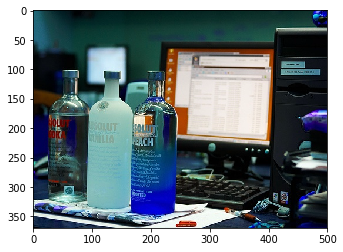

Ground Truth:


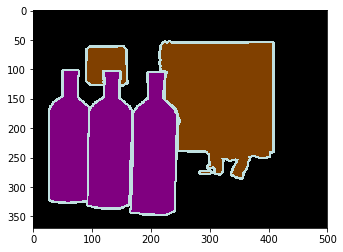

Mean shift with spatial : 10  and color:  20
Less Segmentation


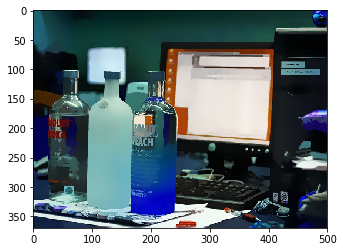

Mean shift with spatial : 10  and color:  70
Over Segmentation


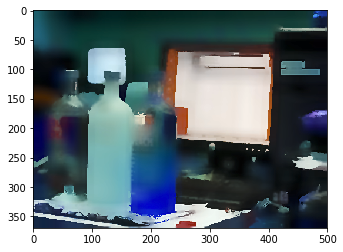

Mean shift with spatial : 30  and color:  50
Pretty Good


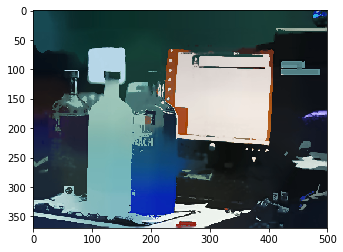

Mean shift with spatial : 40  and color:  60
Pretty Good


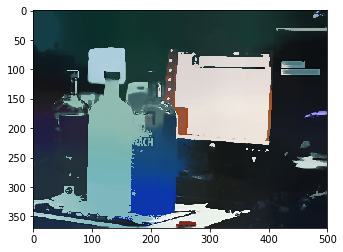

In [19]:
lab = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
for i,j,x in vodka:
    mean_shift(lab, i,j,x)

In [ ]:
bike = [(10,30,"Less Segmentation"),(20,60,"Over Segmentation"),(20,30, "Pretty Good"),(40,40, "Pretty Good")]
img_path = objects[3]+'.jpg'
img = cv2.imread(img_path)
print("Image:")
plt.imshow(img)
plt.show()

In [ ]:
gt_path = objects[3] + '.png'
gt = cv2.imread(gt_path)
print("Ground Truth:")
plt.imshow(gt)
plt.show()

Image:


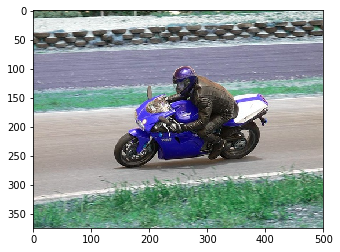

Ground Truth:


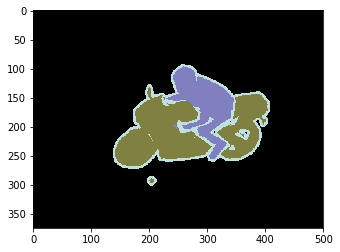

Mean shift with spatial : 10  and color:  30
Less Segmentation


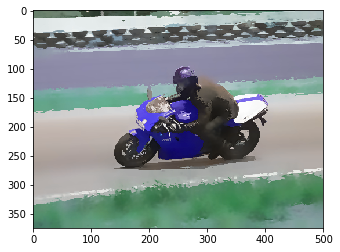

Mean shift with spatial : 20  and color:  60
Over Segmentation


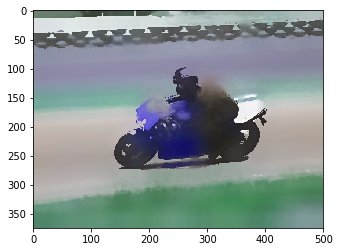

Mean shift with spatial : 20  and color:  30
Pretty Good


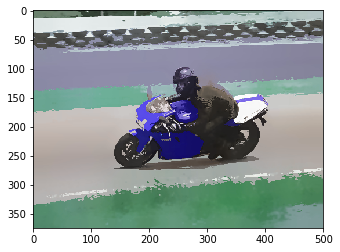

Mean shift with spatial : 40  and color:  40
Pretty Good


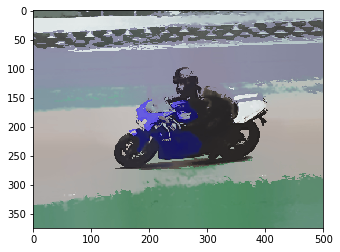

In [20]:
lab = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
for i,j,x in bike:
    mean_shift(lab, i,j,x)

### Conclusions:

<br> 1. Spatial and color window radii which are too small (for example in the range of 0-15) or too high (eg. range 65+) generally leads to under and over segmentation
<br> 2. The outputs show better segmentation when both the radii are closer to each other. Eg: spatial size = 40 and color radius = 30. Large deviations result in a bad segmentation
<br> 3. The process is slower for radii with large values (>60)
<br> 4. It is difficult to judge the segmentation as there isn't a quantitiave way we are doing it. Thus the conclusions are subjective to the user/ viewer.
<br> 5. The color radius seems to have a higher effect on the output of the mean shift segmentor than the spatial radius. this could be an indicator that color is a good measure for segmentation
<br> 6. The algorithm is very ambiguous, and it's difficult to determine what the input parameters for a particular image should be.

### Selective Search
<br>
Below is the implementation of Selective Search algorithm [http://www.huppelen.nl/publications/selectiveSearchDraft.pdf] using OpenCv's function [https://docs.opencv.org/3.4.2/d5/df0/group__ximgproc__segmentation.html
] 
<br> Selective Search is a region proposal agorithm which is used for object detection. It uses the Felzenszwalb and Huttenlocher’s graph-based image segmentation algorithm as a starting step to generate regions of interest.
<br> The algorithm uses region based charectersticts like color, texture, shape and size to iteratively group the regions together. Selective Search calculates the similarities between all neighboring regions and then the two most similar regions are grouped together. For the next step, new similarities are calculated between the grouped regions and the process is repeated till we obtain one single image.
<br> For our implementation, we have first considered only color based similarity. And the second version considers all similarities. 
<br> We have also restricted the number of regions to be displayed to be 100.
<br> To quantitatively evaluate the results, the "recall" is computed which is the fraction of the Ground Truth boxes overlapping with the regions found. For the regions to be passed, the threshold is set to be 0.5 (these passed boxes are indicated in red)
<br> <br> Basic Algorithm:
1. read the input image
2. Resize the image (for faster calculations and better results)
3. Read the ground truth coordinates from the xml file and resize them accordingly
4. Display the ground truths on the input image
5. Set the SelectiveSearch object and set the strategies
6. Limit the region proposals to 100

7. Print the found regions with the input image (in blue)
8. Calculate the overlap between the found regions and the groun truth
9. If the overlap is > 0.5 display it the region (in red)
10. Repeat till no regions are left


### Selective search with only color as a strategy, with bounding boxes with threshold > 0.5

In [1]:
##code : https://www.learnopencv.com/selective-search-for-object-detection-cpp-python/
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import xmltodict

In [2]:
cow = "2007_000464"
airplane = "2007_001288"
vodka = "2007_002953"
bike = "2007_005989"

In [3]:
objects=[cow, airplane, vodka, bike]

In [4]:
def overlap_recall(x,y,w,h,gt_xmin, gt_xmax, gt_ymin, gt_ymax): #function to calculate the overlap 
    
    #get the dimensions of the bounding box
    bb_xmin = x
    bb_xmax = x + w
    bb_ymin = y
    bb_ymax = y + h
    #calculate the area of the bounding box
    bb_area = w * h
    #get the dimensions of the intersection box
    overlap_xmin = max(gt_xmin, bb_xmin)
    overlap_xmax = min(gt_xmax, bb_xmax)
    overlap_ymin = max(gt_ymin, bb_ymin)
    overlap_ymax = min(gt_ymax, bb_ymax)
    #get the area of the intersection box and ground truth
    overlap_area = round((overlap_xmax - overlap_xmin)*(overlap_ymax - overlap_ymin))
    gt_area = round((gt_xmax - gt_xmin) * (gt_ymax - gt_ymin))
    
    if (overlap_xmin > overlap_xmax) or (overlap_ymin > overlap_ymax):
        overlap = 0
    else:
        overlap = max(0, overlap_area / (gt_area + bb_area - overlap_area)) #calculate overlap as intersection /union
    
    return overlap
    
    
    

Displaying the ground truth of the image  2007_000464


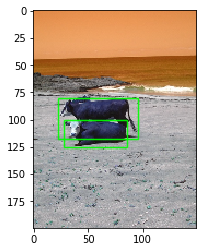

Total Number of Region Proposals: 81
Using only color strategy
IOU:  0.7202666666666667
IOU:  0.8293224731580896
IOU:  0.7107894736842105
IOU:  0.7033796016898008
IOU:  0.7804516845612736
IOU:  0.9070714550166605
IOU:  0.6419844502036283
IOU:  0.5689655172413793
IOU:  0.6192271442035815


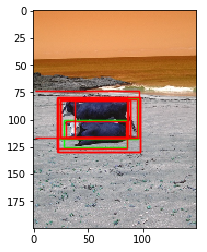

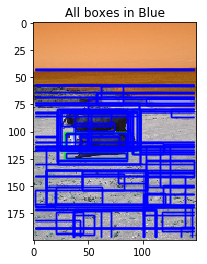

Vote =  [1. 1.]
Recall =  1.0
Displaying the ground truth of the image  2007_001288


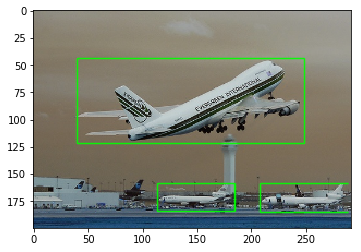

Total Number of Region Proposals: 100
Using only color strategy
IOU:  0.6411483253588517
IOU:  0.5901116427432217
IOU:  0.9308513675555302
IOU:  0.9461461579163972
IOU:  0.5661971830985916
IOU:  0.8857498961362692
IOU:  0.9481837606837606
IOU:  0.5959391485707275
IOU:  0.7551594746716698
IOU:  0.9952380952380953
IOU:  0.6006624953993375
IOU:  0.6200369344413665
IOU:  0.8373205741626795
IOU:  0.6180223285486444
IOU:  0.8342516069788797
IOU:  0.9538353519396173
IOU:  0.9477364740522636
IOU:  0.7987132352941176
IOU:  0.9350999877315667
IOU:  0.8428169014084507
IOU:  0.858790332474543
IOU:  0.8014354066985646


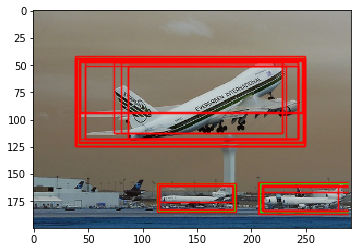

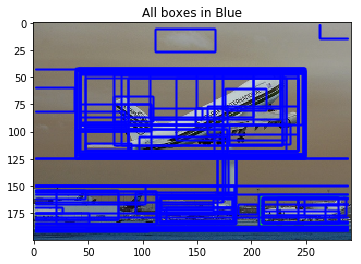

Vote =  [1. 1. 1.]
Recall =  1.0
Displaying the ground truth of the image  2007_002953


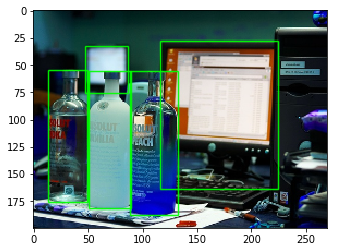

Total Number of Region Proposals: 208
Using only color strategy
IOU:  0.6287878787878788
IOU:  0.9336589336589337
IOU:  0.6552706552706553
IOU:  0.7990702479338843
IOU:  0.8058463361643294
IOU:  0.7392429193899782
IOU:  0.8238935314144228
IOU:  0.6136363636363636
IOU:  0.8433048433048433
IOU:  0.5215794306703397
IOU:  0.665871121718377
IOU:  0.5824175824175825


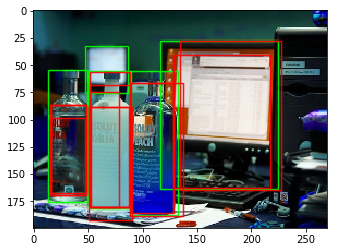

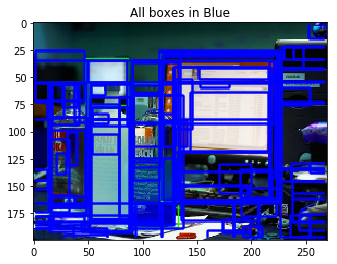

Vote =  [1. 1. 1. 1. 0.]
Recall =  0.8
Displaying the ground truth of the image  2007_005989


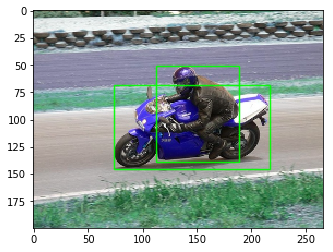

Total Number of Region Proposals: 134
Using only color strategy
IOU:  0.9428300422523066
IOU:  0.7313098086124402
IOU:  0.7212918660287081
IOU:  0.7965133101851852
IOU:  0.9408773045136681
IOU:  0.7856021689497716
IOU:  0.5977002683020314
IOU:  0.667406884021399


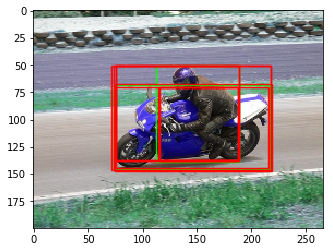

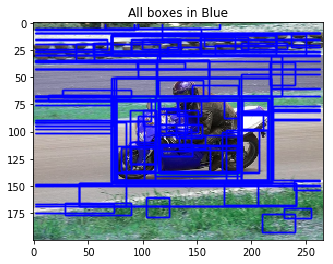

Vote =  [1. 1.]
Recall =  1.0


<Figure size 432x288 with 0 Axes>

In [39]:
# speed-up using multithreads
cv2.setUseOptimized(True);
cv2.setNumThreads(4);
for o in objects: #loop through all the images
    img_path = o+'.jpg'
    img = cv2.imread(img_path)

    # resize image, gives better and faster results

    newHeight = 200
    newWidth = int(img.shape[1]*200/img.shape[0])

    im = cv2.resize(img, (newWidth, newHeight)) 
    
    h_ratio = newHeight/img.shape[0] #store resizing ratios to resize the ground truths
    w_ratio = newWidth/img.shape[1]

    with open(o+'.xml') as fd: #parse the xml file for the dimensions of the ground truths
        object_bb = xmltodict.parse(fd.read())

    l = object_bb['annotation']['object']
    gt = []
    num_gt = 0

    for i in l:
        t = [int(i['bndbox']['xmin']),int(i['bndbox']['ymin']),int(i['bndbox']['xmax']),int(i['bndbox']['ymax'])]
        gt.append(t) #store the coordinates of the ground truth boxes
        num_gt = num_gt +1


    
    #resize the ground truths with respect to the resized image
    for i in gt:
        i[0] = round(i[0] * w_ratio)
        i[2] = round(i[2] * w_ratio)
        i[1] = round(i[1] * h_ratio)
        i[3] = round(i[3] * h_ratio)
    
    print("Displaying the ground truth of the image ", o)
    
    for i in gt:
        cv2.rectangle(im, (i[0],i[1]), (i[2],i[3]), (0, 255, 0), 1, cv2.LINE_AA)
    plt.imshow(im)
    plt.show()


    plt.clf()
    vote = np.zeros(num_gt)

    # create Selective Search Segmentation Object using default parameters
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    #clear all the strategies
    ss.clearStrategies()
    #create a strategy for only color
    stra_color = cv2.ximgproc.segmentation.createSelectiveSearchSegmentationStrategyColor()
    #add it back
    ss.addStrategy(stra_color)

    # set input image on which we will run segmentation
    ss.setBaseImage(im)

    ss.switchToSingleStrategy()


    # run selective search segmentation on input image
    rects = ss.process()
    print('Total Number of Region Proposals: {}'.format(len(rects)))
    
    #restric the minimum number of regions to be displayed to 100
    if(len(rects) > 100):
        nb_rects = 100
    else:
        nb_rects = len(rects)

    while True:
        vote = np.zeros(num_gt)
        wimg = im.copy()
        wimg_1 = im.copy()
        #counter for number of bounding boxes obtained in each iteration
        counter = 0 
        print("Using only color strategy")
        #loop over all the boxes
        for i in range(len(rects)):
            if (i < nb_rects):
                counter_gt = 0
                x, y, w, h = rects[i] #store the coordinates of the bounding box
                for g in gt: #loop over all the ground truths to calculate the overlap
                    overlap = overlap_recall(x,y,w,h,g[0], g[2], g[1], g[3])
                    #threshold to 0.5
                    if(overlap > 0.5):
                        vote[counter_gt] = 1
                        #print("Debug")
                        #print(vote)
                        #print(counter_gt)
                        color = (255,0,0) #passed boxes in red
                        cv2.rectangle(wimg, (x, y), (x+w, y+h), color, 1, cv2.LINE_AA)
                        #counter_gt = counter_gt + 1
                        print("IOU: ", overlap)
                        
                    cv2.rectangle(wimg_1, (x, y), (x+w, y+h), (0,0,255), 1, cv2.LINE_AA) 
                    counter_gt = counter_gt + 1        
                counter = counter + 1
        #cv2.imshow("Output", wimg);
        #c = cv2.waitKey()
        #f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
        plt.imshow(wimg)
        plt.show()
        plt.title("Thresholded boxes in red")
        plt.imshow(wimg_1)
        plt.title("All boxes in Blue")
        if(o == cow and counter == 21):
            cow_image = wimg.copy()
        if(o == airplane and counter == 50):
            airplane_image = wimg.copy()
        if(o == bike and counter == 30):
            bike_image = wimg.copy()
        if(o == vodka and counter == 60):
            vodka_image = wimg.copy()
        plt.show()
        recall = np.count_nonzero(vote)/len(vote)
        print("Vote = ", vote)
        print("Recall = ", recall)
        
        #print("Count of rects:", counter)
        #nb_rects -= 10 #decrement in counts of 10
        
        #if(nb_rects < 1): 
        break; #if no more bounding boxes found
            
            
    plt.clf()
    #cv2.destroyAllWindows()

### Selective search with all strategies with bounding boxes with threshold > 0.5

Displaying the ground truth of the image  2007_000464


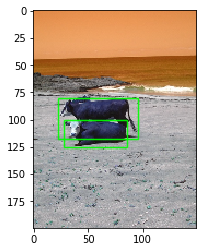

Total Number of Region Proposals: 715
Using all strategies: 
IOU:  0.5793103448275863
IOU:  0.5283318223028105
IOU:  0.5020689655172413
IOU:  0.6840993132593767
IOU:  0.872416250890948
IOU:  0.8163643095149945
IOU:  0.7934782608695652
IOU:  0.6923361717882266
IOU:  0.694701646090535
IOU:  0.6977525187290106
IOU:  0.6168085894113291
IOU:  0.5310344827586206
IOU:  0.8811551277304702
IOU:  0.653836843379327
IOU:  0.766241134751773
IOU:  0.6719733432062199


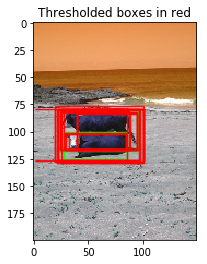

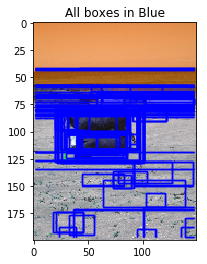

Count of rects: 100
Recall =  1.0
Vote =  [1. 1.]
Displaying the ground truth of the image  2007_001288


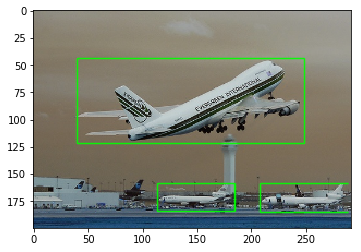

Total Number of Region Proposals: 1461
Using all strategies: 
IOU:  0.5152741994847257
IOU:  0.5801360544217687
IOU:  0.798675009201325
IOU:  0.8448117539026629
IOU:  0.9477364740522636
IOU:  0.9516493447808405
IOU:  0.9703571428571428
IOU:  0.5925925925925926
IOU:  0.9731363331094695
IOU:  0.6163660900503006
IOU:  0.8488063660477454
IOU:  0.9285714285714286
IOU:  0.9405217391304348
IOU:  0.9603729603729604
IOU:  0.9005580923389143
IOU:  0.8940397350993378
IOU:  0.5244755244755245


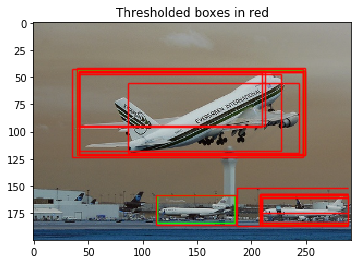

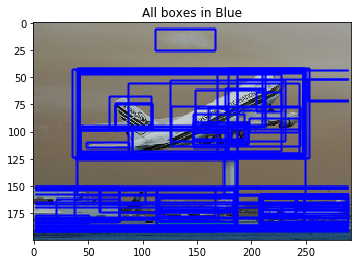

Count of rects: 100
Recall =  1.0
Vote =  [1. 1. 1.]
Displaying the ground truth of the image  2007_002953


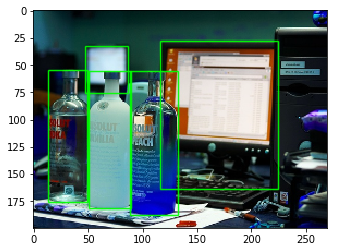

Total Number of Region Proposals: 3882
Using all strategies: 
IOU:  0.934640522875817
IOU:  0.8678332092330603
IOU:  0.6410256410256411
IOU:  0.5227272727272727
IOU:  0.9579248366013072
IOU:  0.5959982971477225
IOU:  0.9641873278236914
IOU:  0.7717864923747276
IOU:  0.800942285041225
IOU:  0.7271005509641874


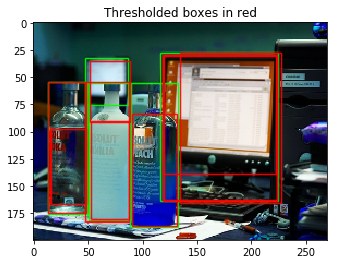

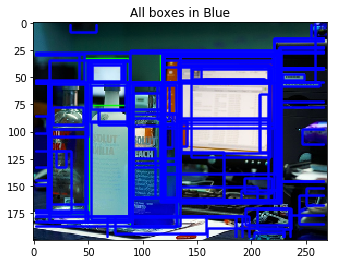

Count of rects: 100
Recall =  1.0
Vote =  [1. 1. 1. 1. 1.]
Displaying the ground truth of the image  2007_005989


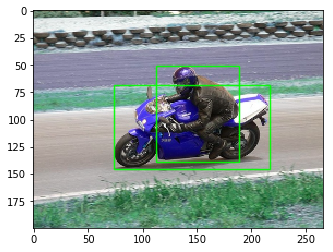

Total Number of Region Proposals: 2343
Using all strategies: 
IOU:  0.7373974208675264
IOU:  0.9365994236311239
IOU:  0.7965133101851852
IOU:  0.6611570247933884
IOU:  0.5126658624849216
IOU:  0.6547455295735901
IOU:  0.7952956134774316
IOU:  0.7595596755504056
IOU:  0.6547997457088366
IOU:  0.5919816723940435


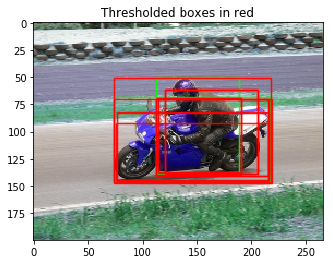

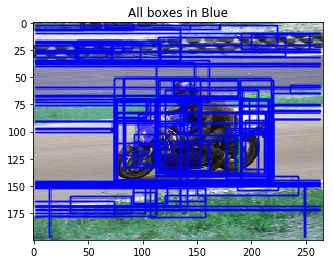

Count of rects: 100
Recall =  1.0
Vote =  [1. 1.]


<Figure size 432x288 with 0 Axes>

In [38]:
# speed-up using multithreads
cv2.setUseOptimized(True);
cv2.setNumThreads(4);
for o in objects: #loop through all the images
    img_path = o+'.jpg'
    img = cv2.imread(img_path)

    # resize image, gives better and faster results

    newHeight = 200
    newWidth = int(img.shape[1]*200/img.shape[0])

    im = cv2.resize(img, (newWidth, newHeight)) 
    
    h_ratio = newHeight/img.shape[0] #store resizing ratios to resize the ground truths
    w_ratio = newWidth/img.shape[1]

    with open(o+'.xml') as fd: #parse the xml file for the dimensions of the ground truths
        object_bb = xmltodict.parse(fd.read())

    l = object_bb['annotation']['object']
    gt = []
    num_gt = 0

    for i in l:
        t = [int(i['bndbox']['xmin']),int(i['bndbox']['ymin']),int(i['bndbox']['xmax']),int(i['bndbox']['ymax'])]
        gt.append(t) #store the coordinates of the ground truth boxes
        num_gt = num_gt +1


    
    #resize the ground truths with respect to the resized image
    for i in gt:
        i[0] = round(i[0] * w_ratio)
        i[2] = round(i[2] * w_ratio)
        i[1] = round(i[1] * h_ratio)
        i[3] = round(i[3] * h_ratio)
    
    print("Displaying the ground truth of the image ", o)
    
    for i in gt:
        cv2.rectangle(im, (i[0],i[1]), (i[2],i[3]), (0, 255, 0), 1, cv2.LINE_AA)
    plt.imshow(im)
    plt.show()


    plt.clf()

    # create Selective Search Segmentation Object using default parameters
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

    # set input image on which we will run segmentation
    ss.setBaseImage(im)

    # Switch to high recall but slow Selective Search method
    ss.switchToSelectiveSearchQuality()


    # run selective search segmentation on input image
    rects = ss.process()
    print('Total Number of Region Proposals: {}'.format(len(rects)))
    
    #restric the minimum number of regions to be displayed to 100
    if(len(rects) > 100):
        nb_rects = 100
    else:
        nb_rects = len(rects)

    while True:
        vote = np.zeros(num_gt)
        wimg = im.copy()
        wimg_1 = im.copy()
        #counter for number of bounding boxes obtained in each iteration
        counter = 0 
        print("Using all strategies: ")
        #loop over all the boxes
        for i in range(len(rects)):
            if (i < nb_rects):
                counter_gt = 0
                x, y, w, h = rects[i] #store the coordinates of the bounding box
                for g in gt: #loop over all the ground truths to calculate the overlap
                    overlap = overlap_recall(x,y,w,h,g[0], g[2], g[1], g[3])
                    #threshold to 0.5
                    if(overlap > 0.5):
                        vote[counter_gt] = 1
                        color = (255,0,0) #passed boxes in red
                        cv2.rectangle(wimg, (x, y), (x+w, y+h), color, 1, cv2.LINE_AA) 
                        print("IOU: ", overlap)
                    #else:
                     #   color = (0,255,0)#green

                    cv2.rectangle(wimg_1, (x, y), (x+w, y+h), (0, 0, 255), 1, cv2.LINE_AA) 
                    counter_gt = counter_gt + 1
                counter = counter + 1
        #cv2.imshow("Output", wimg);
        #c = cv2.waitKey()
        #f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
        plt.imshow(wimg)
        plt.title("Thresholded boxes in red")
        plt.show()
        plt.imshow(wimg_1)
        plt.title("All boxes in Blue")
        #plt.imshow(wimg)
        if(o == cow and counter == 10):
            cow_image_all = wimg.copy()
        if(o == airplane and counter == 60):
            airplane_image_all = wimg.copy()
        if(o == bike and counter == 20):
            bike_image_all = wimg.copy()
        if(o == vodka and counter == 50):
            vodka_image_all = wimg.copy()
        plt.show()
        
        print("Count of rects:", counter)
        recall = np.count_nonzero(vote)/len(vote)
        print("Recall = ", recall)
        print("Vote = ", vote)
        #nb_rects -= 10 #decrement in counts of 10
        
        #if(nb_rects < 1): 
        break; #if no more bounding boxes found
            
            
    plt.clf()
    #cv2.destroyAllWindows()

In [28]:
from prettytable import PrettyTable
x = PrettyTable()
print('Recall for All strategies and only color')
x.field_names = ["Image Name", "Strategy", "Recall"]
x.add_row(["Cow" , "All" , 1])
x.add_row(["Cow" , "Color" , 1])
x.add_row(["Airplane" , "All" , 1])
x.add_row(["Airplane" , "Color" , 1])
x.add_row(["Bottles" , "All" , 1])
x.add_row(["Bottles" , "Color" , 0.8])
x.add_row(["Bike" , "All" , 1])
x.add_row(["Bike" , "Color" , 1])
print(x)

Recall for All strategies and only color
+------------+----------+--------+
| Image Name | Strategy | Recall |
+------------+----------+--------+
|    Cow     |   All    |   1    |
|    Cow     |  Color   |   1    |
|  Airplane  |   All    |   1    |
|  Airplane  |  Color   |   1    |
|  Bottles   |   All    |   1    |
|  Bottles   |  Color   |  0.8   |
|    Bike    |   All    |   1    |
|    Bike    |  Color   |   1    |
+------------+----------+--------+


### Conclusions:
<br> 1. From the above results we can see that using a threshold of 0.5 to find the best regions works quiet well, especially for bike, cow and airplane images. 
<br> 2. The bottle image performs poorly for both the methods mainly due to the transparency of the bottles. Using only color strategy we get a low recall than using all strategies.
<br> 3. There isn't an obvious difference universally between using color strategy and all. But for the bottles image, it performs poorly.
<br> 4. Resizing the image resulted in a much faster performance, and a better overall result. This could be since the texture and details of the images are getting suppressed due to resizing.
<br> 5. Using IOU to threshold the boxes is a good measure as the standard output gives numerous false positives which are filtered out easily.
<br> 6. The recall would probably be higher for the bottles image if the number of boxes were more.
<br> 7. The IOU seems to be a better indicator of determining how accurate is the algorithm. Boxes with IOU > 0.8 are extremely accurate.